

---



# Actividad 4: Regresión Logística


---




***¿Qué es una regresión logística?***

Regresión logística es un algoritmo de inteligencia de máquina, el objetivo es predecir la probabilidad de una variable categórica dependiente. La variable dependiente es una variable binaria, codificada ya sea como 0-1, si-no, verdadero-falso, éxito-fallo, etc. Entonces, lo que el modelo de regresión logística predice es P(Y=1) en función de X.

***Los supuestos de regresión logística***


*   Se requiere una variable dependiente binaria para resgresión logística binaria.
*   Se debe considerar el factor 1 de la variable dependiente como el resultado deseado en la regresión logística binaria.
*   Se debe cuidar tener solo las variables/atributos que realmente aportan, que son significativos.
*   Se requiere que las variables independientes sean independientes entre ellas.
*   Se requiere una muestra grande para regresión logística.



# 0. Importar las librerías necesarias

Al igual que la actividad pasada, podrás ocupar `pandas` y `numpy` para procesar los datos y `matplotlib.pyplot` para las visualizaciones.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# 1. Importar los datos

Importa los datos de la actividad pasada. Verás que están las columnas `x` e `y`. Separalas en dos `numpy arrays`.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/IIC2433/Syllabus-2020-2/master/Actividades/AC03/data.csv')

In [4]:
x_array = data['x'].to_numpy()
y_array = data['y'].to_numpy()

# 2. Transformación de los datos

**2.0.** Ahora deberás transformar los datos contínuos del eje Y a datos categóricos, de modo que un dato menor a la mediana sea mapeado a cero, mientras que los mayores sean mapeados a uno.

Terminada la transformación, grafica los nuevos datos en un scatter plot.

In [5]:
mapped_y = np.array(list(map(lambda y: 0 if y <= np.median(y_array) else 1,y_array)))

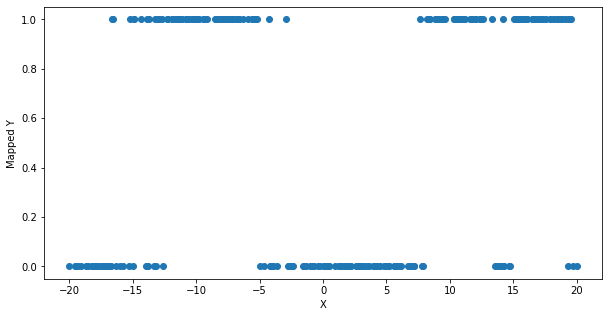

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(x_array, mapped_y)
plt.xlabel('X')
plt.ylabel('Mapped Y')
plt.show()

**2.1.** Antes de estimar los parámetros $\alpha$ y $\beta$, nos será útil una función que nos entregue el valor de $\hat{y}$ dados estos valores y el valor de $x$.


In [44]:
def predecir(valor, alfa, beta):
  y_tongo = 1/(1 + np.e**(-(alfa + beta*valor)))
  return y_tongo

**2.2.** ***Stochastic Gradient Descent (SGD) para sacar alfa y beta***

El proceso de Gradient Descent busca minimizar siguiendo los gradientes de la función de pérdida.
En inteligencia de máquina usamos la técnica que evalua y actualiza los coeficientes en cada iteración para minimizar el error del modelo en nuestro set de entrenamiento.

Si bien existen muchas implementaciones distintas, para esta actividad usarán un proceso iterativo que actualizará sus parámetros a partir del error obtenido, del gradiente de su función predictora y de un valor llamado $learning\ rate$.

Para una iteración $t$, el valor de un parámetro $\beta$ en $t+1$ estará dado por:

$$
\beta(t+1)=\beta(t)+\gamma * \epsilon * f'(x)
$$

Donde $\epsilon$ corresponde al error que incurre nuestro modelo, $\gamma$ es el $learning\ rate$ y $f'(x)$ corresponde a la gradiente.

Para efectos de esta actividad, tenemos que nuestra función $f(x)$ es la sigmoide:

$$
f(x)=\frac{1}{1+e^{-(\alpha+\beta x)}}
$$

Donde $x$ es el valor de la variable dependiente, $\alpha$ y $\beta$ son los parámetros que buscamos optimizar. Ya que nuestra función es sigmoide, podemos también asumir

$$
f'(x) = f(x) * (1- f(x))=\hat{y}*(1-\hat{y})
$$

Donde $\hat{y}$ corresponde a la predicción de $y$ dados $\alpha$ y $\beta$ de la función.

En resumen, ustedes deberán implementar una función que optimize los parámetros alfa y beta, en una cantidad de ciclos específica.

En cada ciclo, deberán actualizar, para todos los datos entregados, los parámetros de forma

$$
\alpha = \alpha + \gamma * (y - \hat{y}) * \hat{y} * (1- \hat{y})
$$

$$
\beta = \beta + \gamma * (y - \hat{y}) * \hat{y} * (1- \hat{y}) * x
$$

con $\hat{y}$ siendo la predicción, $(y - \hat{y})$ el error de la predicción, $x$ es de valor de entrada y el $\gamma$ es la tasa de aprendizaje que debe ser configurada i.e. $0.01$

In [46]:
def coeficientes(X, Y, gamma, epochs):
  alfa = 0
  beta = 0
  #[Escribe tu respuesta aquí]
  for j in range(epochs):
    for i in range(len(X)):
      y_tongo = predecir(X[i], alfa, beta)
      alfa = alfa + gamma * (Y[i] - y_tongo) * y_tongo * (1 - y_tongo)
      beta = beta + gamma * (Y[i] - y_tongo) * y_tongo * (1 - y_tongo) * X[i]
  return alfa, beta

**2.3.** Nuestro leaning rate $\gamma$ y la cantidad de ciclos por las que entrenaremos el modelo estan dadas por las siguientes variables:

In [45]:
GAMMA = 0.5
EPOCHS = 50

250


**2.4.** Ahora, están listos para obtener los coeficientes del modelo y graficarlo.

In [62]:
alfa, beta = coeficientes(x_array, mapped_y, GAMMA, EPOCHS)
print(f'Alfa: {alfa}, Beta: {beta}')

Alfa: -7.177992035153753, Beta: -1.674389017816464


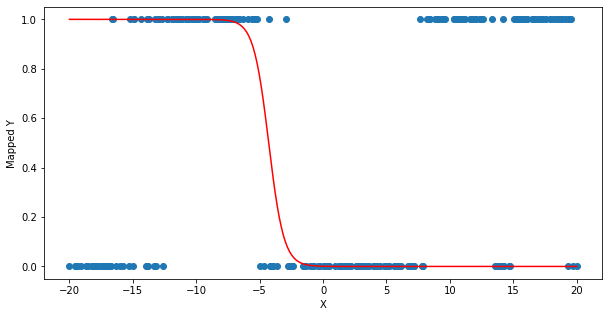

In [61]:
x1 = np.linspace(x_array.min(), x_array.max(), len(x_array), endpoint=True)

plt.figure(figsize=(10, 5))
plt.scatter(x_array, mapped_y)
plt.xlabel('X')
plt.ylabel('Mapped Y')

plt.plot(x1, predecir(x1, alfa, beta), color='red')
plt.show()